In [ ]:
# Skimpy is not part of base Python, needs to be installed
!pip install skimpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports packages to be used in the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as skl
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from skimpy import skim

print(skl.__version__)

1.2.2


In [ ]:
# # mount google drive
#from google.colab import drive
#drive.mount('/content/gdrive/')
#from google.colab import drive
#drive.mount('/content/drive')

#from google.colab import files
#file_upload = files.upload()

from google.colab import files
uploaded = files.upload()

Saving loans.csv to loans.csv


In [ ]:
!ls /content/gdrive/MyDrive/Colab Notebooks/MIT Xpro/Regression_DMD_XPRO.ipynb

ls: cannot access '/content/gdrive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/MIT': No such file or directory
ls: cannot access 'Xpro/Regression_DMD_XPRO.ipynb': No such file or directory


Lets read in the data into a Pandas dataframe just like we did for Linear Regression.

In [ ]:
# uses pandas package to read file to a dataframe
import pandas as pd
#file_path=r'/content/loans.csv'
#df = pd.read_csv('/content/loans.csv', encoding='utf-8', on_bad_lines='skip')
#df = pd.read_csv('/content/drive/MyDrive/loans.csv', encoding='UTF-8', on_bad_lines='skip')
#df = pd.read_csv("/content/drive/MyDrive/loans.csv",encoding='UTF-8', on_bad_lines='skip')
#df = pd.read_csv('/content/drive/MyDrive/loans_new.csv',encoding='UTF-8', on_bad_lines='skip')

#from google.colab import files
#uploaded = files.upload('/content/drive/MyDrive/XPro/loans.csv')


df = pd.read_excel("loans.csv")
print(df)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
0           0          829        4.93         737        28.85          0   
1           0          228        4.81         707        33.62          0   
2           0          367        4.51         682         3.51          1   
3           0          162        4.93         712        33.67          1   
4           0          103        4.91         667         4.74          0   
...       ...          ...         ...         ...          ...        ...   
9511        1          345        5.29         672       215.37          2   
9512        1          258        4.84         722         0.18          5   
9513        1           98        4.60         687        10.04          8   
9514        1          352        4.70         692         0.00          5   
9515        1          853        4.89         732        37.88          6   

      records  
0           0  
1           0  
2           0  

# New Section

In [ ]:
# shows first 6 rows of dataframe
df.head(22)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0
6,1,194,4.65,667,3.84,0,1
7,1,131,4.78,722,24.22,0,0
8,0,87,4.95,682,69.91,1,0
9,0,84,4.43,707,5.63,1,0


# shows last 6 rows of dataframe
df.tail(6)

In [ ]:
df.tail(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


Separate files into Default and No Default

In [ ]:
default = df.loc[df['default']==1]
no_default = df.loc[df['default']==0]
skim(default)
skim(no_default)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        1 │       0 │     1 │     1 │     1 │     1 │      1 │     ▇   │  │
│ │ installment       │    0 │       0 │      340 │     220 │    16 │   170 │   290 │   490 │    930 │ ▆▇▅▃▂▂  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.29 │   3.3 │   4.6 │   4.7 │   4.9 │    5.8 │    ▃▇▂  │  │
│ │ fico_score        │    0 │       0 │      700 │      34 │   620 │   670 │   690 │   720 │    820 │  ▁▇▇▃▁  │  │
│ │ rev_balance       │    0 │       0 │       21 │      50 │     0 │   3.4 │   8.9 │    21 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      2.3 │     2.9 │     0 │     0 │     1 │     3 │     33 │   ▇▁    │  │
│ │ records           │    0 │       0 │    0.092 │    0.29 │     0 │     0 │     0 │     0 │      2 │  ▇  ▁   │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        0 │       0 │     0 │     0 │     0 │     0 │      0 │     ▇   │  │
│ │ installment       │    0 │       0 │      320 │     200 │    16 │   160 │   270 │   430 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.8 │    0.26 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │    ▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │  ▆▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       16 │      30 │     0 │   3.2 │   8.6 │    18 │    950 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.4 │       2 │     0 │     0 │     1 │     2 │     31 │    ▇    │  │
│ │ records           │    0 │       0 │    0.057 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Let's get a sense of the dataset using 'skim' just like we did for Linear Regression

In [ ]:
# skim() provides visual summary of dataframe
skim(df)
#16% of the data set defaults


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   160 │   270 │   440 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.27 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │   ▁▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │ ▁▆▇▅▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      34 │     0 │   3.3 │   8.7 │    18 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.2 │     0 │     0 │     1 │     2 │     33 │    ▇    │  │
│ │ records           │    0 │       0 │    0.062 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['default'])
df['default'] = label_encoder.transform(df['default'])

#strategy_type = CategoricalDtype(categories=['Sell', 'Buy', 'Hold'], ordered=True)
#df['Strategy'] = df['Strategy'].astype(strategy_type)
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   160 │   270 │   440 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.27 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │   ▁▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │ ▁▆▇▅▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      34 │     0 │   3.3 │   8.7 │    18 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.2 │     0 │     0 │     1 │     2 │     33 │    ▇    │  │
│ │ records           │    0 │       0 │    0.062 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Lets compare the data we have for borrowers who defaulted vs. borrowers who did not, again by skimming the data corresponding to those respective subsets.

In [ ]:
# prompt:

df_default = df[df['default'] == 1]
df_no_default = df[df['default'] == 0]
skim(df_default)
skim(df_no_default)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        1 │       0 │     1 │     1 │     1 │     1 │      1 │     ▇   │  │
│ │ installment       │    0 │       0 │      340 │     220 │    16 │   170 │   290 │   490 │    930 │ ▆▇▅▃▂▂  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.29 │   3.3 │   4.6 │   4.7 │   4.9 │    5.8 │    ▃▇▂  │  │
│ │ fico_score        │    0 │       0 │      700 │      34 │   620 │   670 │   690 │   720 │    820 │  ▁▇▇▃▁  │  │
│ │ rev_balance       │    0 │       0 │       21 │      50 │     0 │   3.4 │   8.9 │    21 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      2.3 │     2.9 │     0 │     0 │     1 │     3 │     33 │   ▇▁    │  │
│ │ records           │    0 │       0 │    0.092 │    0.29 │     0 │     0 │     0 │     0 │      2 │  ▇  ▁   │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        0 │       0 │     0 │     0 │     0 │     0 │      0 │     ▇   │  │
│ │ installment       │    0 │       0 │      320 │     200 │    16 │   160 │   270 │   430 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.8 │    0.26 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │    ▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │  ▆▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       16 │      30 │     0 │   3.2 │   8.6 │    18 │    950 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.4 │       2 │     0 │     0 │     1 │     2 │     31 │    ▇    │  │
│ │ records           │    0 │       0 │    0.057 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# subset dataframe for default is 0
# 0=Buy, 1=Hold, 2=Sell
skim(df[df['default']==0])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        0 │       0 │     0 │     0 │     0 │     0 │      0 │     ▇   │  │
│ │ installment       │    0 │       0 │      320 │     200 │    16 │   160 │   270 │   430 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.8 │    0.26 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │    ▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │  ▆▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       16 │      30 │     0 │   3.2 │   8.6 │    18 │    950 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.4 │       2 │     0 │     0 │     1 │     2 │     31 │    ▇    │  │
│ │ records           │    0 │       0 │    0.057 │    0.26 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# subset dataframe for default is 1
skim(df[df['default']==1])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │        1 │       0 │     1 │     1 │     1 │     1 │      1 │     ▇   │  │
│ │ installment       │    0 │       0 │      340 │     220 │    16 │   170 │   290 │   490 │    930 │ ▆▇▅▃▂▂  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.29 │   3.3 │   4.6 │   4.7 │   4.9 │    5.8 │    ▃▇▂  │  │
│ │ fico_score        │    0 │       0 │      700 │      34 │   620 │   670 │   690 │   720 │    820 │  ▁▇▇▃▁  │  │
│ │ rev_balance       │    0 │       0 │       21 │      50 │     0 │   3.4 │   8.9 │    21 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      2.3 │     2.9 │     0 │     0 │     1 │     3 │     33 │   ▇▁    │  │
│ │ records           │    0 │       0 │    0.092 │    0.29 │     0 │     0 │     0 │     0 │      2 │  ▇  ▁   │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Lets take a look at defaults vs. inquiries via a scatter plot, just like we did for Blue Bike rentals vs. temeperature when we looked at Linear Regression. Shows binary nature variable of target variable.

Text(0, 0.5, 'inquiries')

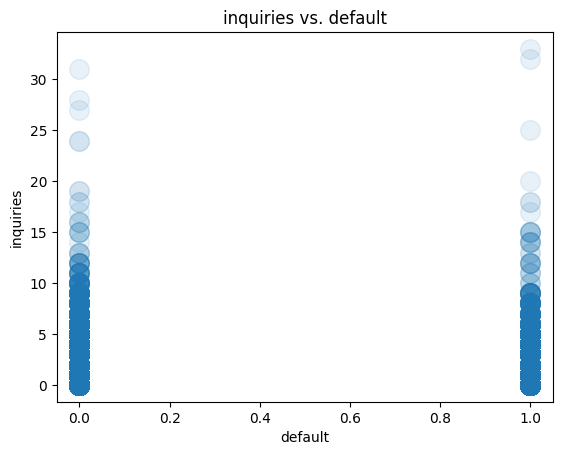

In [ ]:
# plot target variable
plt.scatter(df['default'], df['inquiries'],alpha =0.1, s=200)
plt.title('inquiries vs. default')
plt.xlabel('default')
plt.ylabel('inquiries')

## **Logistic Regression in Python**

Lets begin by splitting the data into a training set (on which we will train our model) and a test sert (on which we will evaulate it).

### **Split Data**

In [ ]:
# data split into 70% train and 30% test
df_train, df_test = train_test_split(df, test_size=0.3)

In [ ]:
print(df_train)
# Save the DataFrame to a CSV file
# Replace 'file_path' with the path where you want to save the file
file_path = 'drive/MyDrive/df_train.csv'
df_train.to_csv(file_path, index=False)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
5404        0          171        4.48         672         7.77          1   
2860        0          335        4.85         667        22.88          0   
6540        0          682        4.85         697         3.15          2   
4388        0          538        4.72         712        15.50          0   
6396        0           78        4.23         727        12.00          1   
...       ...          ...         ...         ...          ...        ...   
2833        0          519        4.60         662        15.59          0   
1946        0           35        4.00         667         0.44          0   
8348        0          332        4.81         652        21.71         12   
1027        0          231        4.86         672        15.89          1   
1578        1          847        5.11         712        46.66          1   

      records  
5404        0  
2860        0  
6540        0  

OSError: Cannot save file into a non-existent directory: 'drive/MyDrive'

Lets skim the train and test data. You will notice -- as we hope -- that the two datasets have very similar statistics

In [ ]:
'''
Here is the skimpy summary of the training data:

Number of rows: 6661
Number of columns: 7
Data Types: 5 columns of type 'int64' and 2 columns of type 'float64'
NA values: No missing values in the training data
Numeric columns and their summary statistics (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for each column:
default: 16% of the data set defaults
installment: Mean of 320, with values ranging from 16 to 930
log_income: Mean of 4.7, with values ranging from 3.3 to 6.3
fico_score: Mean of 710, with values ranging from 610 to 820
rev_balance: Mean of 17, with values ranging from 0 to 1200
inquiries: Mean of 1.6, with values ranging from 0 to 33
records: Mean of 0.063, with values ranging from 0 to 5
'''
skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6661   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.16 │    0.37 │     0 │     0 │     0 │     0 │      1 │ ▇    ▂  │  │
│ │ installment       │    0 │       0 │      320 │     210 │    16 │   160 │   270 │   440 │    940 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.8 │    0.27 │   3.3 │   4.6 │   4.8 │   4.9 │    6.3 │   ▁▇▆   │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    830 │ ▁▆▇▅▃▁  │  │
│ │ rev_balance       │    0 │       0 │       17 │      36 │     0 │   3.2 │   8.7 │    18 │   1200 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.6 │     2.2 │     0 │     0 │     1 │     2 │     33 │    ▇    │  │
│ │ records           │    0 │       0 │    0.063 │    0.27 │     0 │     0 │     0 │     0 │      5 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
'''
Here is the skimpy summary of the test data:

Number of rows: 2855
Number of columns: 7
Data Types: 5 columns of type 'int64' and 2 columns of type 'float64'
NA values: No missing values in the test data
Numeric columns and their summary statistics (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for each column:
default: 16% of the data set defaults
installment: Mean of 320, with values ranging from 17 to 940
log_income: Mean of 4.7, with values ranging from 3.3 to 6.1
fico_score: Mean of 710, with values ranging from 610 to 830
rev_balance: Mean of 17, with values ranging from 0 to 950
inquiries: Mean of 1.5, with values ranging from 0 to 31
records: Mean of 0.061, with values ranging from 0 to 3
'''

skim(df_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2855   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default           │    0 │       0 │     0.15 │    0.36 │     0 │     0 │     0 │     0 │      1 │ ▇    ▁  │  │
│ │ installment       │    0 │       0 │      320 │     200 │    16 │   160 │   270 │   430 │    930 │ ▇▇▅▃▂▁  │  │
│ │ log_income        │    0 │       0 │      4.7 │    0.26 │   3.3 │   4.6 │   4.7 │   4.9 │    5.8 │    ▃▇▂  │  │
│ │ fico_score        │    0 │       0 │      710 │      38 │   610 │   680 │   710 │   740 │    820 │  ▅▇▆▃▁  │  │
│ │ rev_balance       │    0 │       0 │       16 │      29 │     0 │   3.3 │   8.7 │    18 │    510 │    ▇    │  │
│ │ inquiries         │    0 │       0 │      1.5 │     2.2 │     0 │     0 │     1 │     2 │     32 │    ▇    │  │
│ │ records           │    0 │       0 │    0.061 │    0.25 │     0 │     0 │     0 │     0 │      3 │    ▇    │  │
│ └───────────────────┴──────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### ** Generate / Fit Model**

In [ ]:
'''
The logistic regression results provide insights into the relationships between the dependent variable (default) and the
independent variables (installment, log_income, fico_score, rev_balance, inquiries, records). Here are some key points from the summary:

Pseudo R-squared: The Pseudo R-squared value is approximately 0.053 (0.05285), indicating that the model explains about 5.3% of the variation
in the dependent variable.

Coefficients:

Intercept: The intercept is 9.2627. This is the log-odds of the dependent variable when all independent variables are zero.
installment: For a one-unit increase in installment, the log-odds of default increase by 0.0012.
log_income: For a one-unit increase in log_income, the log-odds of default decrease by 1.0265.
fico_score: For a one-unit increase in fico_score, the log-odds of default decrease by 0.0096.
rev_balance: For a one-unit increase in rev_balance, the log-odds of default increase by 0.0041.
inquiries: For a one-unit increase in inquiries, the log-odds of default increase by 0.1309.
records: For a one-unit increase in records, the log-odds of default increase by 0.2432.
P-values: All the p-values are less than 0.05, indicating that each coefficient is statistically significant.

Likelihood Ratio Test (LLR) p-value: The LLR p-value tests whether the model, including all predictors, is significantly
better than a null model with no predictors. The very low p-value (2.433e-63) suggests that the model is statistically significant.

Overall, the logistic regression model suggests that the included variables have a significant impact on predicting the
likelihood of default.

'''
# build formula,  target (depedent variable) ~ features (indepedent variables)
#formula="Strategy ~ Volume + Open + Close"
formula="default ~ installment + log_income + fico_score + rev_balance + inquiries + records"

# build model, fit the formula to the training data using a logistic algorithim (logit)
est = logit(formula=formula, data=df_train).fit()

# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.420300
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6654
Method:                           MLE   Df Model:                            6
Date:                Fri, 22 Mar 2024   Pseudo R-squ.:                 0.05324
Time:                        03:45:27   Log-Likelihood:                -2799.6
converged:                       True   LL-Null:                       -2957.1
Covariance Type:            nonrobust   LLR p-value:                 5.269e-65
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.0778      0.980      9.268      0.000       7.158      10.998
installment     0.0012    

In [ ]:
'''
Each row represents an observation in the test data, and the predicted_probability column shows the model's
estimated probability of default for each observation.

the model's predicted probability of default (predicted_probability).
'''

# apply the model (est) to the test data and make predictions
preds = est.predict(df_test)
df_test['predicted_probability'] = preds

# print top 6 predicted probabilities
df_test.head(25)


,default,installment,log_income,fico_score,rev_balance,inquiries,records,predicted_probability
6361,0,549,4.93,687,16.80,1,0,0.187896
7898,0,170,4.20,642,4.47,0,0,0.266830
4257,0,160,4.44,667,2.96,0,1,0.219482
5170,0,97,4.75,682,21.08,2,0,0.158617
1179,0,222,5.02,687,68.48,0,0,0.138979
2622,0,249,4.69,737,6.72,0,0,0.089467
6690,0,203,4.26,787,2.82,0,0,0.071824
8436,1,248,4.50,652,8.38,1,0,0.243071
4319,0,234,4.45,782,9.80,0,0,0.069326
1319,0,147,4.80,697,17.56,1,1,0.152168


In [ ]:
'''
I have added the 'will_default' column to the DataFrame,
indicating whether the predicted probability of default is greater than 0.5.

'''
# test for 'predicted_probability > 0.5, if yes assign will_default to 1, otherwise to 0
df_test['will_default'] = np.where(df_test['predicted_probability']>0.5, 1, 0)
df_test.head(6)
print(df_test)

      default  installment  log_income  fico_score  rev_balance  inquiries  \
6361        0          549        4.93         687        16.80          1   
7898        0          170        4.20         642         4.47          0   
4257        0          160        4.44         667         2.96          0   
5170        0           97        4.75         682        21.08          2   
1179        0          222        5.02         687        68.48          0   
...       ...          ...         ...         ...          ...        ...   
1666        1          231        4.70         692        20.25          0   
8580        0           62        4.78         647        47.25          3   
3529        0          343        4.70         727        10.17          0   
2565        0          338        4.53         772         0.03          0   
4808        0          477        5.05         792        19.37          0   

      records  predicted_probability  will_default  
6361      

In [ ]:
(1202*1000)-(226*5000)
(1195+3)/(1195+223+7+3)

0.8389355742296919

### **Evaluate Model**

Accuracy:0.8469352014010508


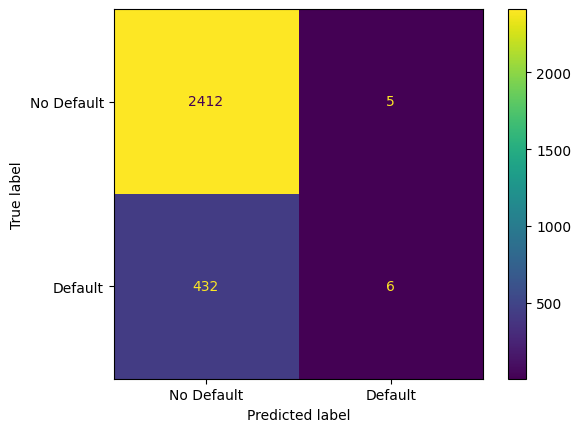

In [ ]:
'''
The accuracy of your logistic regression model on the test data is approximately 83.5%.
'''
# Evaluation Metrics
# print confusion matrix with labels

ConfusionMatrixDisplay.from_predictions(df_test['default'], df_test['will_default'], display_labels = ['No Default', 'Default'])
# print accuracy
print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

In [ ]:
cm = confusion_matrix(df_test['default'], df_test['will_default'])
cm_baseline = ((cm[0,0]+cm[0,1])*1000)-((cm[1,0]+cm[1,1])*5000)
print(cm[0,0], cm[1,0], cm[0,1], cm[1,1])
cm_baseline

2412 432 5 6


227000

In [ ]:
'''

The profit at the threshold of 0.5 for the given confusion matrix is calculated based on the following formula:

Profit = (True Negatives × Profit per True Negative) − (False Positives × Loss per False Positive)

Given your specific profit and loss values of $1000 for a True Negative and -$5000 for a False Positive,
the profit at a threshold of 0.5 is calculated.

Profit at Threshold of 0.5 = $67000
'''

cm = confusion_matrix(df_test['default'], df_test['will_default'])
cm_profit = 1000*cm[0,0]-5000*cm[1,0]
print('Profit at Threshold of 0.5 = $'+str(cm_profit))

Profit at Threshold of 0.5 = $252000


In [ ]:
'''

The predicted probabilities from logistic regression typically range from 0 to 1.
Setting a threshold greater than 1.0 may not be meaningful. The usual practice is to choose a threshold between 0 and 1.

If you're interested in optimizing the threshold for a specific profit or cost function,
you might want to consider using a threshold that maximizes your specific objective. You can iterate over different thresholds
 and evaluate the corresponding profits to find the optimal one for your case.

Profit at Threshold of 1.0 = $41000

'''
preds = est.predict(df_test)
df_test['predicted_probability'] = preds
df_test['will_default'] = np.where(df_test['predicted_probability']>1.0, 1, 0)
cm = confusion_matrix(df_test['default'], df_test['will_default'])
cm_profit = 1000*cm[0,0]-5000*cm[1,0]
print('Profit at Threshold of 1.0 = $'+str(cm_profit))

Profit at Threshold of 1.0 = $227000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2024-03-22 03:48:17.861296: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 03:48:17.861382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 03:48:17.863488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 03:48:17.883783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 03:48:19.771315: W tensorflow/compiler/tf2

In [ ]:
!pip install tensorflow

In [ ]:
TIME_STEPS = 40 # Number of previous days to use as input features
TEST_SIZE = 0.2 # Fraction of data to use as test set
THRESHOLD = 0.05 # Threshold for buy/sell/hold strategy

In [ ]:
file_path=r'drive/MyDrive/Colab Notebooks/train.csv'
data = pd.read_csv(file_path)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/train.csv'

NameError: name 'data' is not defined

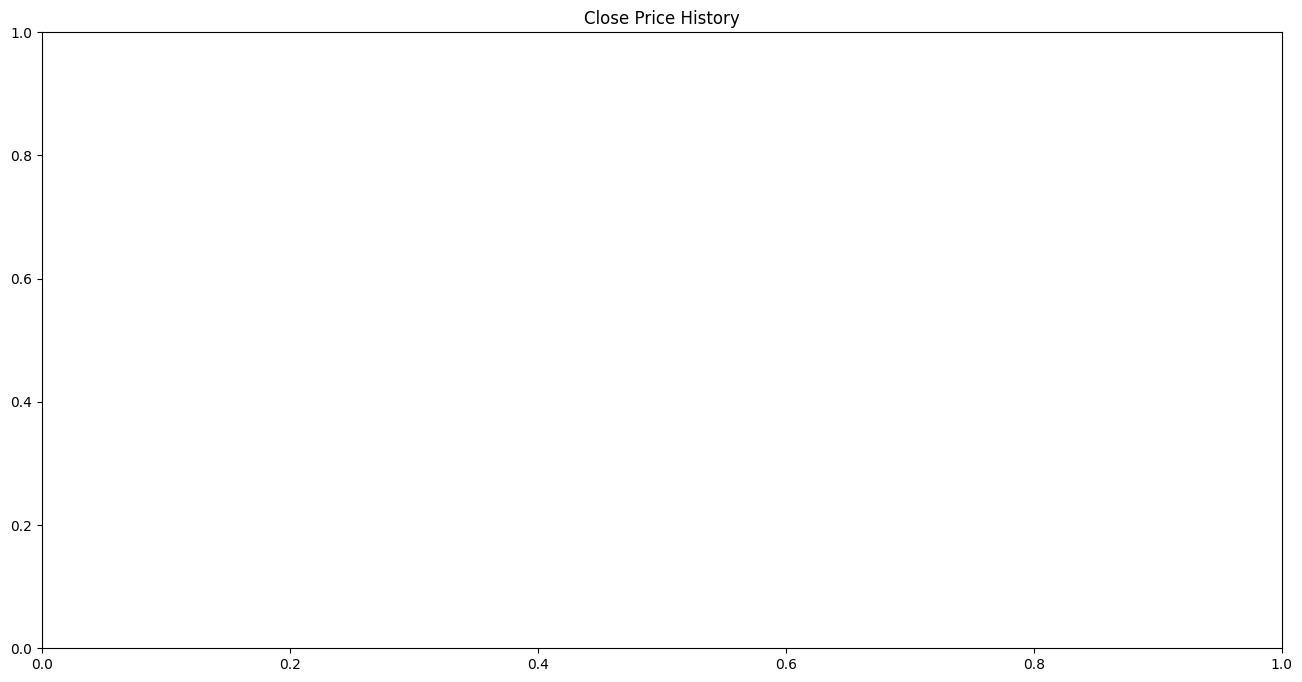

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Split the data
data_train, data_test = train_test_split(data, test_size=TEST_SIZE)

NameError: name 'data' is not defined

In [ ]:
#print(data_test)

In [ ]:
scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train[['Close']])
data_test_scaled = scaler.transform(data_test[['Close']])

NameError: name 'data_train' is not defined

In [ ]:
#print(data_test_scaled)

In [ ]:
# Create X and y for train and test sets
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(TIME_STEPS, data_train_scaled.shape[0]):
  X_train.append(data_train_scaled[i-TIME_STEPS:i, 0])
  y_train.append(data_train_scaled[i, 0])

for i in range(TIME_STEPS, data_test_scaled.shape[0]):
  X_test.append(data_test_scaled[i-TIME_STEPS:i, 0])
  y_test.append(data_test_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

NameError: name 'data_train_scaled' is not defined

In [ ]:
# Reshape the data to 3D for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,  (X_test.shape[0],  X_test.shape[1], 1))
#X_test =  np.reshape(X_test, (X_test.shape +(1,)))

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
#print(X_train)

In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=64)

KeyError: 'pop from an empty set'

In [ ]:
# predict the close price using model
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

KeyError: 'pop from an empty set'

NameError: name 'y_true' is not defined

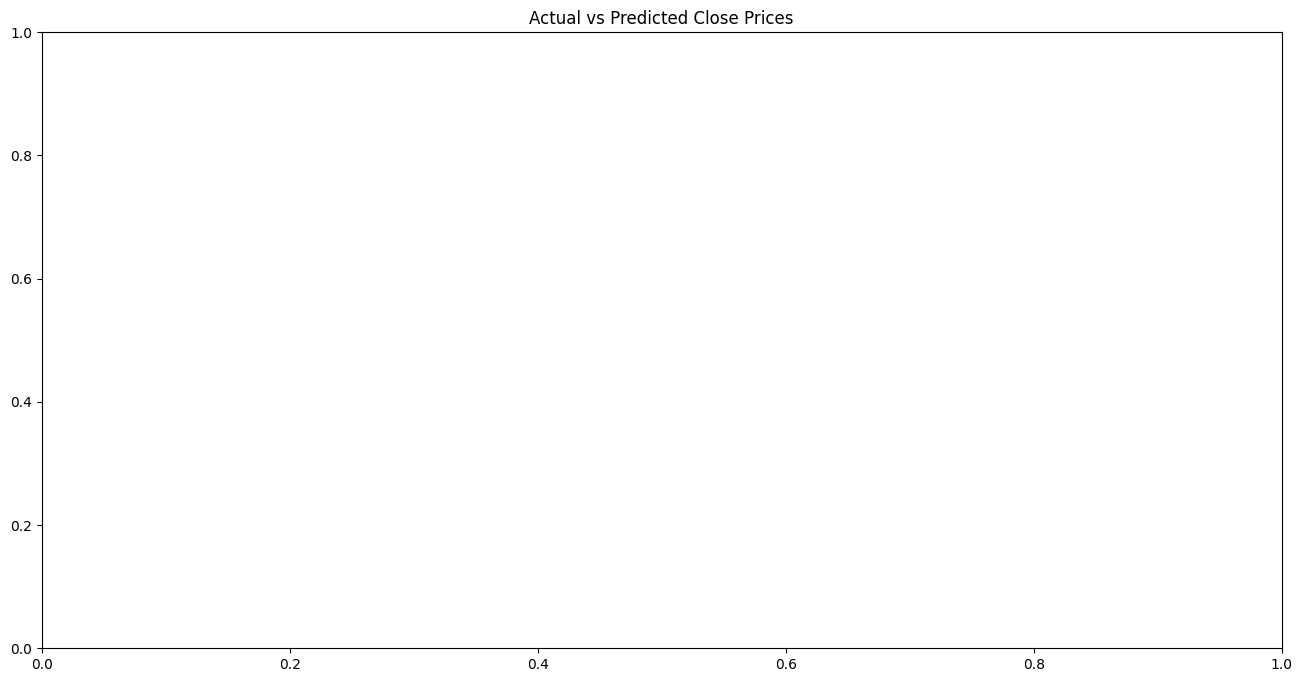

In [ ]:
# Plot the actual and predicted close prices
plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted Close Prices')
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [ ]:
# calculate the SMAPE metric
smape = np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
print(f'SMAPE: {smape}')

NameError: name 'y_pred' is not defined

In [ ]:
# Suggest a strategy based on the predictions and the threshold
strategy = []
for i in range(len(y_pred)):
  if y_pred[i] > y_true[i] * (1 + THRESHOLD):
    strategy.append('Buy')
  elif y_pred[i] < y_true[i] * (1 - THRESHOLD):
    strategy.append('Sell')
  else:
    strategy.append('Hold')

In [ ]:
# Evaluate the strategy using accuracy metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(data_test['Strategy'][TIME_STEPS:], strategy) * 100
print(f'Accuracy: {accuracy}%')

In [ ]:
# Create a dataframe with the date, close price, prediction, and strategy
result = pd.DataFrame()
result['Date'] = data_test['Date'][TIME_STEPS:]
result['Close'] = y_true
result['Prediction'] = y_pred
result['Strategy'] = strategy
result.head()

In [ ]:
for i in range(2, 5):
  print(i)